In [1]:
# Data visualization
# BTech Computer Science Stream, January 2025
# Week 11 & 12 - Time Series Case Study 
# Name: Oswin Vion Dsilva, 240905268, Section CE, Date: 26/03/2024

# Importing libraries

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv data into dataframes

In [3]:
# Loading the data 

var_dfStocks = pd.read_csv("nvidia_stock_data.csv")

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,14.851000,14.996000,14.096000,14.315000,14.305580,401277000
1,04-01-2023,14.567000,14.853000,14.241000,14.749000,14.739294,431324000
2,05-01-2023,14.491000,14.564000,14.148000,14.265000,14.255614,389168000
3,06-01-2023,14.474000,15.010000,14.034000,14.859000,14.849222,405044000
4,09-01-2023,15.284000,16.056000,15.141000,15.628000,15.617717,504231000
...,...,...,...,...,...,...,...
432,23-09-2024,116.550003,116.989998,114.860001,116.260002,116.260002,206228500
433,24-09-2024,116.519997,121.800003,115.379997,120.870003,120.870003,354966800
434,25-09-2024,122.019997,124.940002,121.610001,123.510002,123.510002,284692900
435,26-09-2024,126.800003,127.669998,121.800003,124.040001,124.040001,302582900


# Section 1 : Exploratory Analysis

In [4]:
# Checking Data types and presence of null values

var_dfStocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       437 non-null    object 
 1   Open       437 non-null    float64
 2   High       437 non-null    float64
 3   Low        437 non-null    float64
 4   Close      437 non-null    float64
 5   Adj Close  437 non-null    float64
 6   Volume     437 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.0+ KB


In [5]:
# Checking general statistics of the data

var_dfStocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,62.618792,63.795366,61.340346,62.635151,62.621695,4.554760e+08
std,34.893995,35.606990,33.951698,34.782847,34.783928,1.582334e+08
min,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08
25%,40.097000,40.500000,39.057999,39.770000,39.750576,3.610260e+08
50%,47.500000,48.230000,46.742001,47.506001,47.495808,4.277170e+08
75%,90.000000,91.300003,88.400002,90.356003,90.340851,5.136480e+08
max,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09


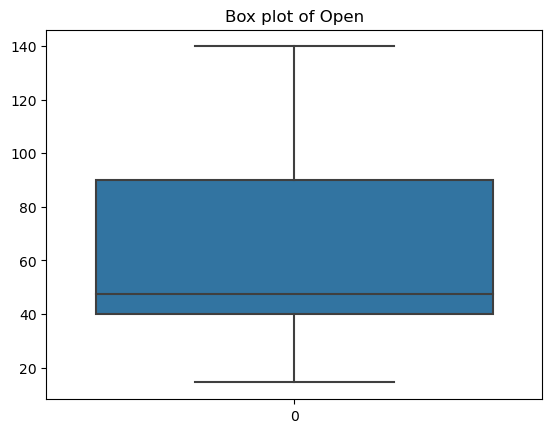

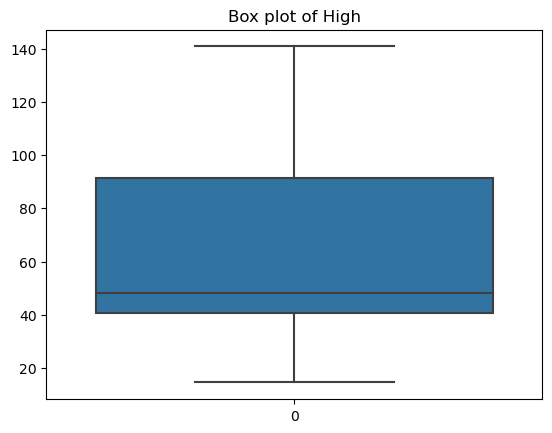

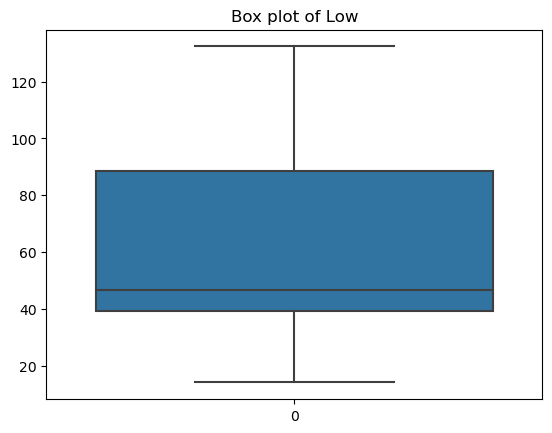

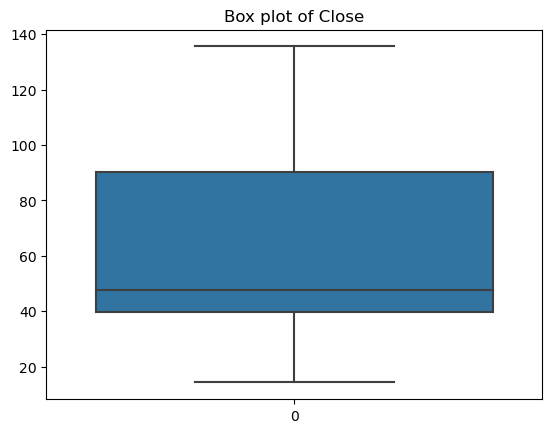

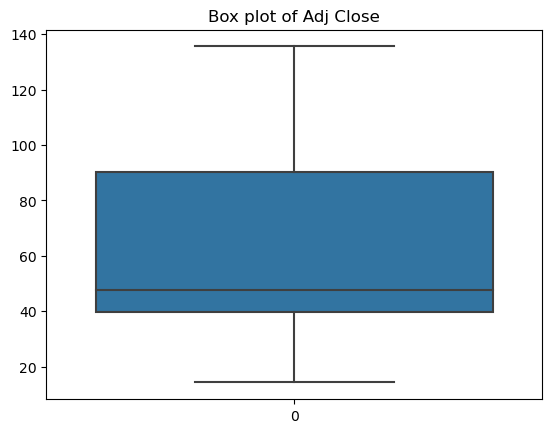

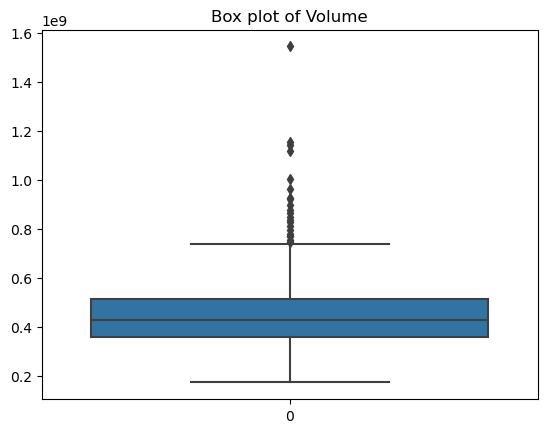

In [6]:
# Box plot to gauge the data

for col in ['Open','High','Low','Close','Adj Close','Volume']:
    plt.figure()
    sns.boxplot(data = var_dfStocks[col])
    plt.title(f"Box plot of {col}")
    plt.show()

# Section 2 : Data Pre-processing

In [7]:
# Function to split the data into year , month and day

def date_split(df):
    df[['Day','Month','Year']] = df['Date'].str.split('-', expand = True).astype('int64')
    
    return df

In [8]:
# Splitting the date using the function

var_dfStocks = date_split(var_dfStocks)

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,03-01-2023,14.851000,14.996000,14.096000,14.315000,14.305580,401277000,3,1,2023
1,04-01-2023,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,4,1,2023
2,05-01-2023,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,5,1,2023
3,06-01-2023,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,6,1,2023
4,09-01-2023,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,9,1,2023
...,...,...,...,...,...,...,...,...,...,...
432,23-09-2024,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,23,9,2024
433,24-09-2024,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,24,9,2024
434,25-09-2024,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,25,9,2024
435,26-09-2024,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,26,9,2024


In [9]:
# Converting the date into a date object type

var_dfStocks['Date'] = pd.to_datetime(var_dfStocks['Date'], dayfirst = True)

var_dfStocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       437 non-null    datetime64[ns]
 1   Open       437 non-null    float64       
 2   High       437 non-null    float64       
 3   Low        437 non-null    float64       
 4   Close      437 non-null    float64       
 5   Adj Close  437 non-null    float64       
 6   Volume     437 non-null    int64         
 7   Day        437 non-null    int64         
 8   Month      437 non-null    int64         
 9   Year       437 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 34.3 KB


In [10]:
# Labelling as Increase or Decrease for the day

var_dfStocks['Net'] = np.where(var_dfStocks['Close'] > var_dfStocks['Open'], 'Gain','Loss')

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Net
0,2023-01-03,14.851000,14.996000,14.096000,14.315000,14.305580,401277000,3,1,2023,Loss
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,4,1,2023,Gain
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,5,1,2023,Loss
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,6,1,2023,Gain
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,9,1,2023,Gain
...,...,...,...,...,...,...,...,...,...,...,...
432,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,23,9,2024,Loss
433,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,24,9,2024,Gain
434,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,25,9,2024,Gain
435,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,26,9,2024,Loss


# Data visualization

In [14]:
# Function to plot candlestick plot for any given dataframe

def plot_candlestick(df,w1,w2):
    var_dfGain = df[df['Net'] == "Gain"]

    var_dfLoss = df[df['Net'] == "Loss"]

    var_Color_up = 'green'
    var_Color_down = 'red'

    width1 = w1
    width2 = w2

    
    plt.figure(figsize=(8,8))
    
    # Plotting the Net Increase values
    ## Plotting the Net value change whose width should be the closing value - opening value, but should go above the opening values since this is for Gain
    plt.bar(var_dfGain.Date, var_dfGain.Close - var_dfGain.Open, width1, bottom = var_dfGain.Open, color = var_Color_up)

    ## Plotting the thin bars representing the peak value 
    plt.bar(var_dfGain.Date, var_dfGain.High - var_dfGain.Close , width2, bottom = var_dfGain.Close, color = var_Color_up)

    ## Plotting the thin bars representing the lowest value
    plt.bar(var_dfGain.Date, var_dfGain.Low - var_dfGain.Open, width2, bottom = var_dfGain.Open, color = var_Color_up)

    # Plotting the Net Decrease values
    ## Plotting the Net value change whose width should be the opening value - closing value but should go below the opening values since this is for Loss
    plt.bar(var_dfLoss.Date, var_dfLoss.Close - var_dfLoss.Open, width1, bottom = var_dfLoss.Open, color = var_Color_down)

    ## Plotting the thin bars representing the peak value
    plt.bar(var_dfLoss.Date, var_dfLoss.High - var_dfLoss.Open, width2, bottom = var_dfLoss.Open, color = var_Color_down)

    ## Plotting the thin bars representing the lowest value
    plt.bar(var_dfLoss.Date, var_dfLoss.Low - var_dfLoss.Close, width2, bottom = var_dfLoss.Close, color = var_Color_down)


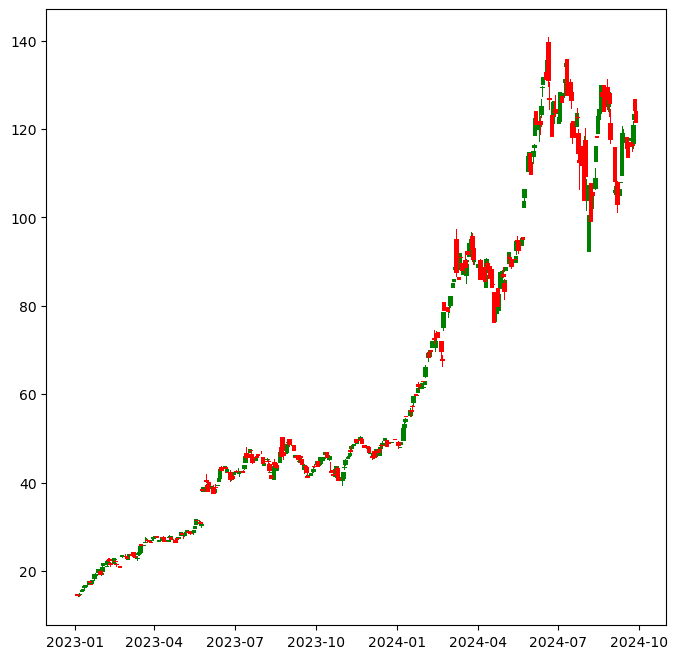

In [19]:
# Candle Stick graph for the entire time period 

var_initial = var_dfStocks.iloc[0]
var_final = var_dfStocks.iloc[len(var_initial)-1]



plot_candlestick(var_dfStocks,5,0.5)

plt.show()

# As we can see, there are breakages in the graph .
# This is mainly due to 2 reasons:
# 1. Unavailable data on those days
# 2. After hour/pre-market trading 

# A better analysis would be visualizing the month by month candle stick graphs for each year 

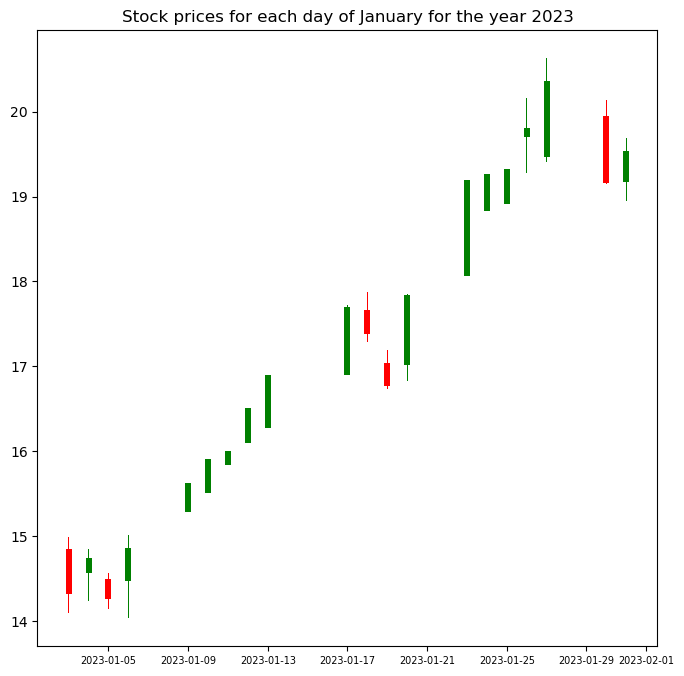

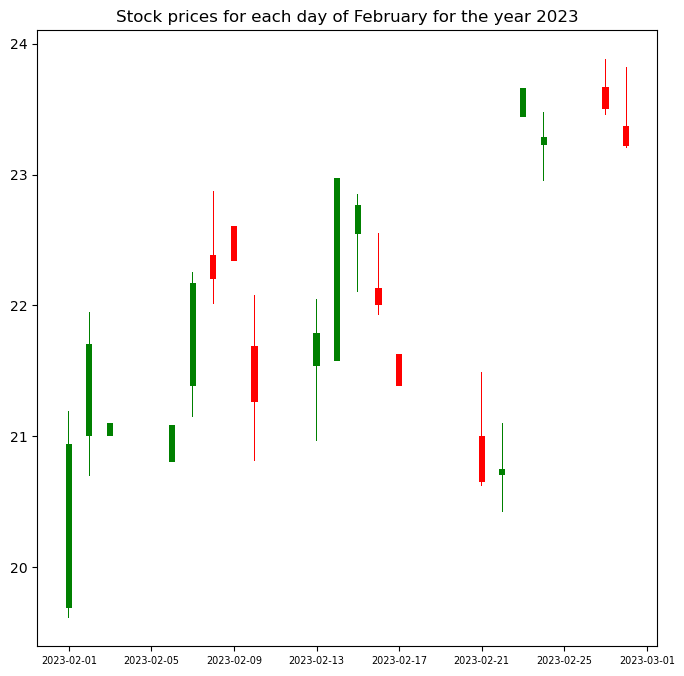

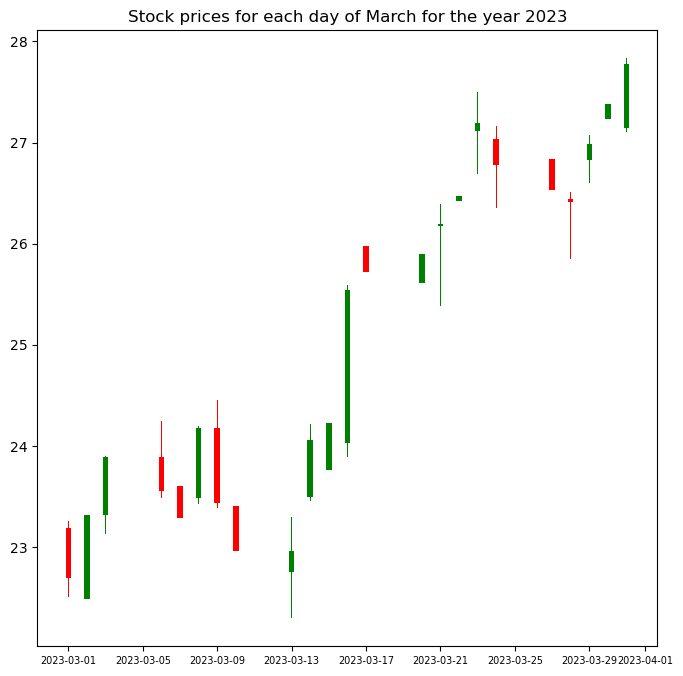

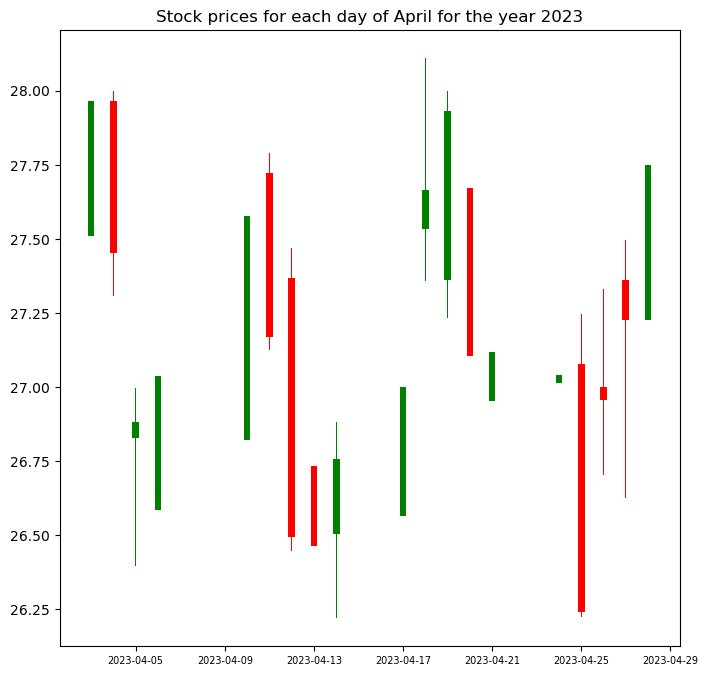

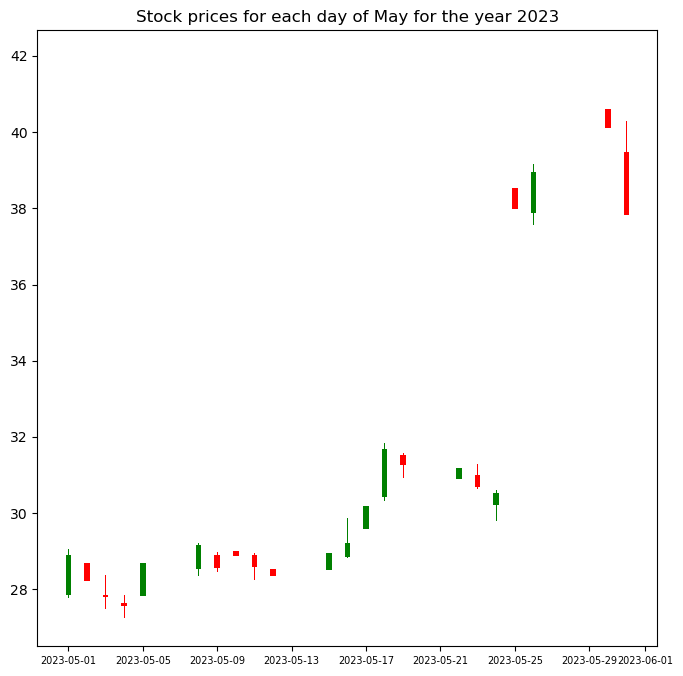

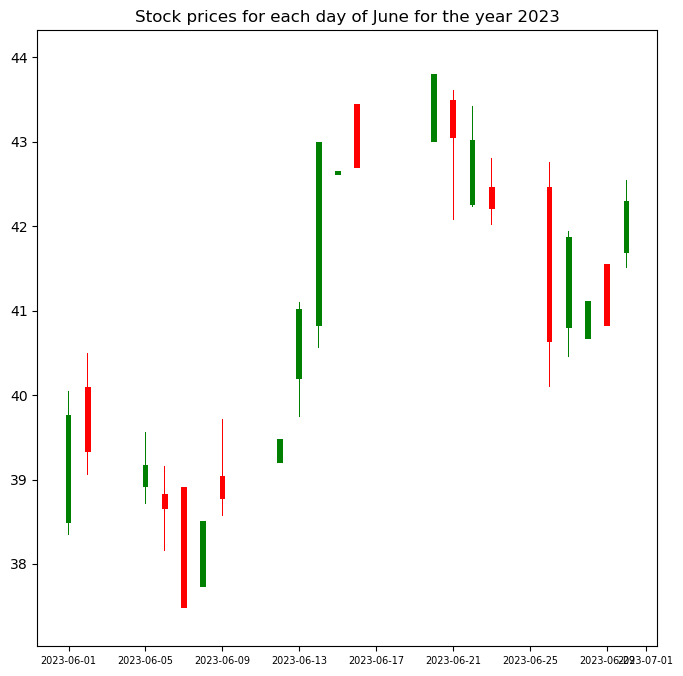

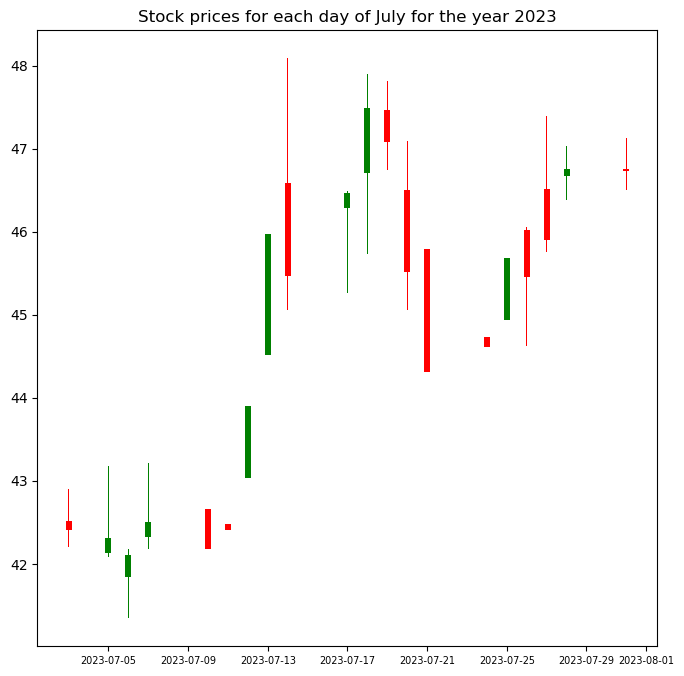

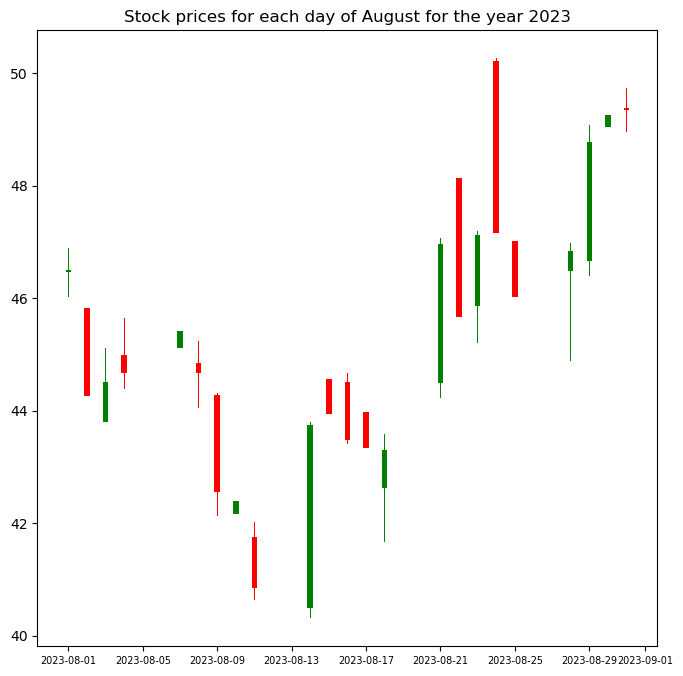

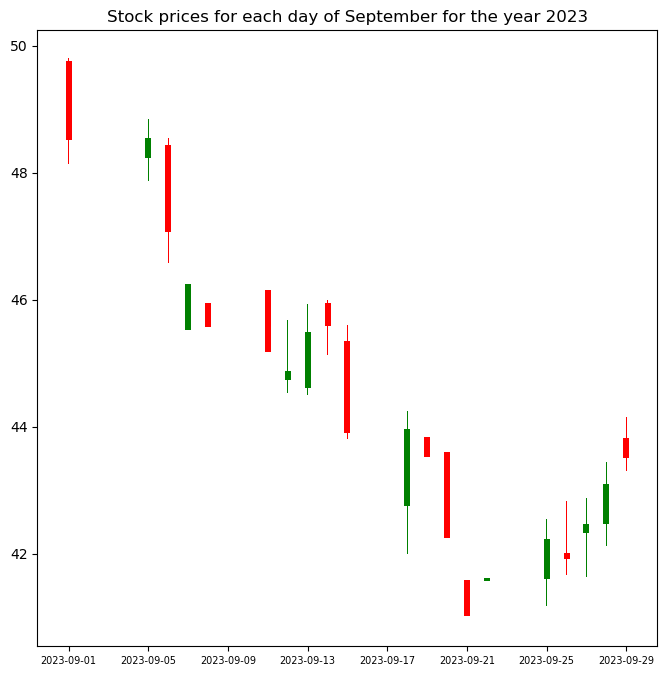

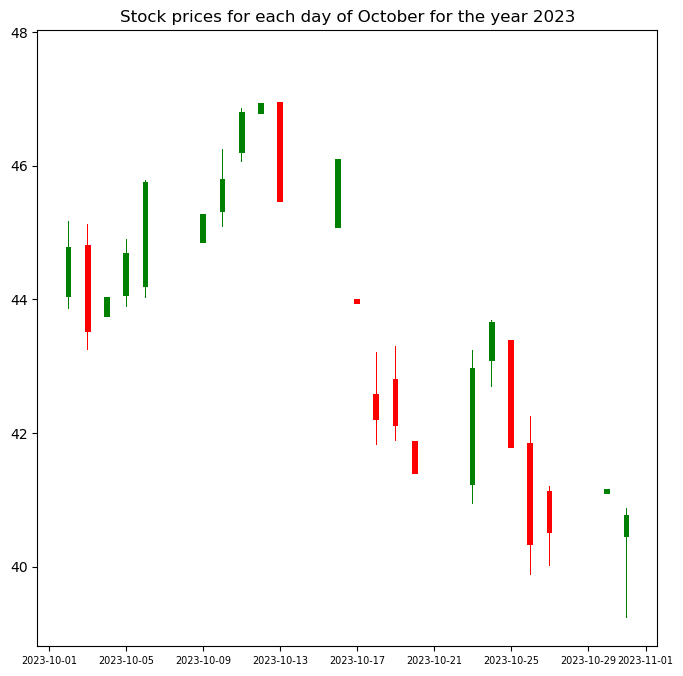

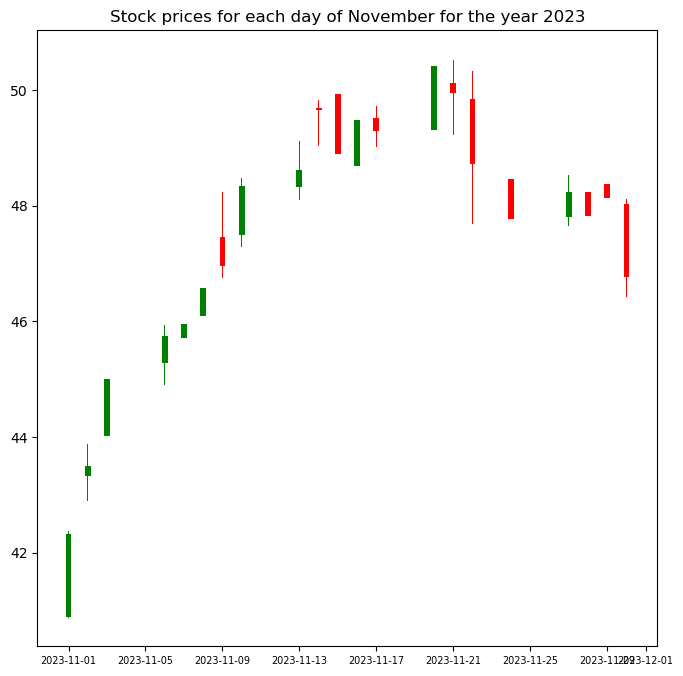

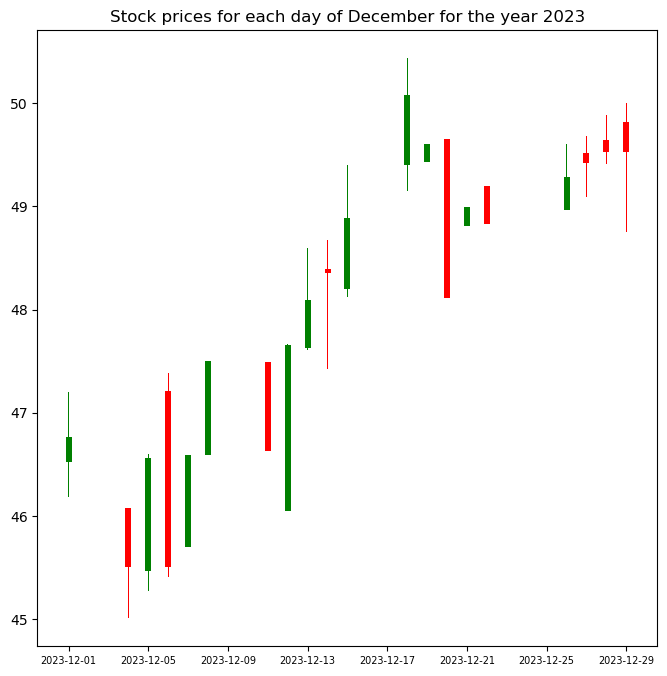

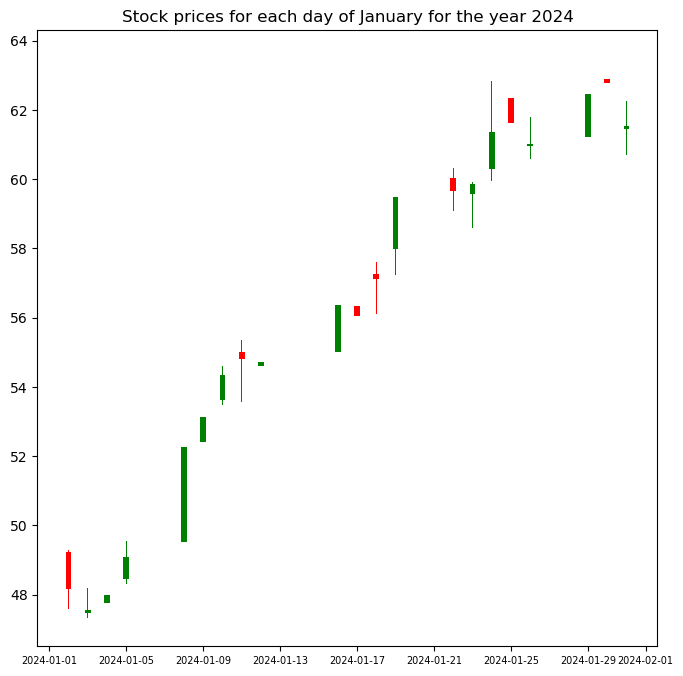

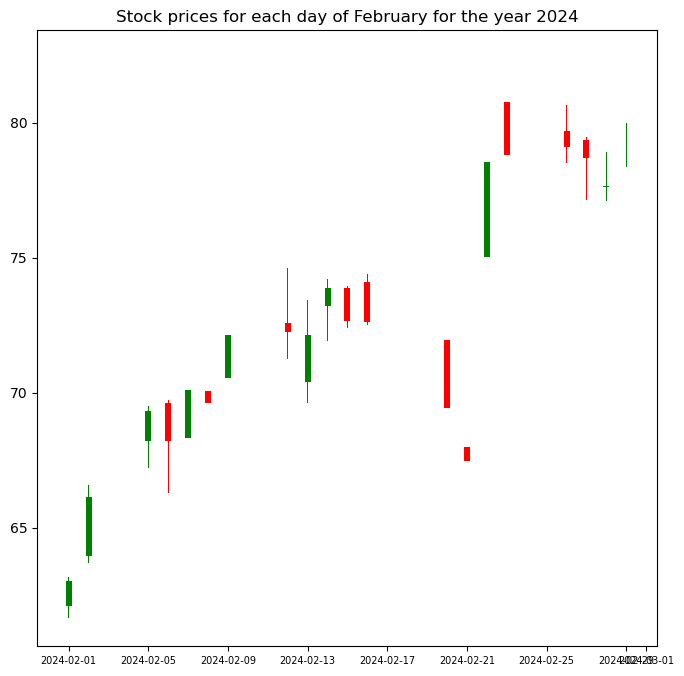

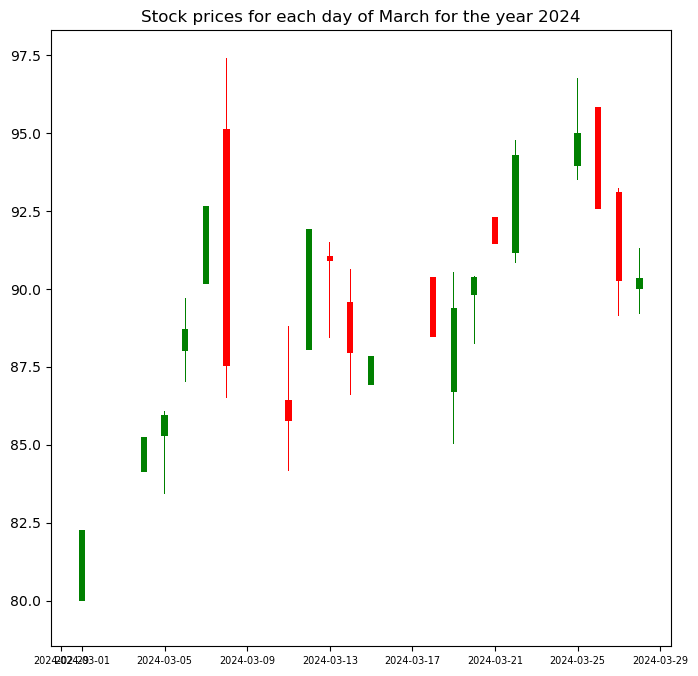

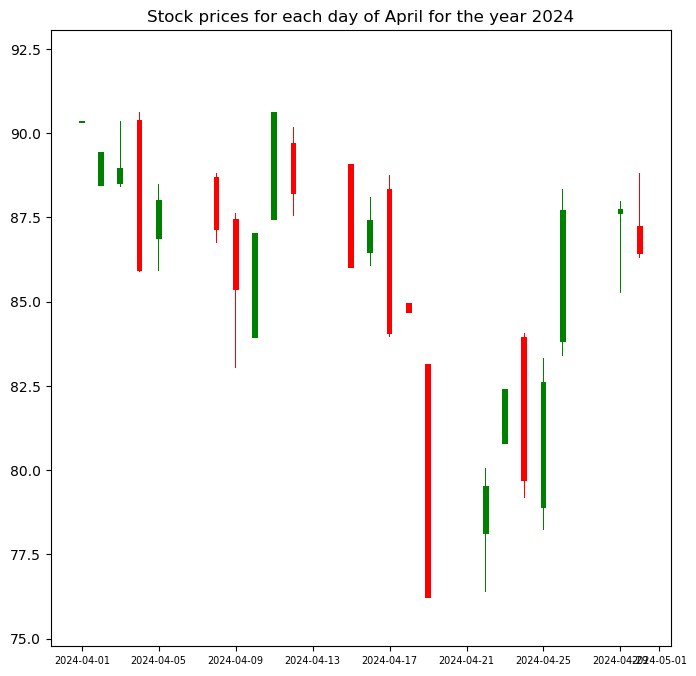

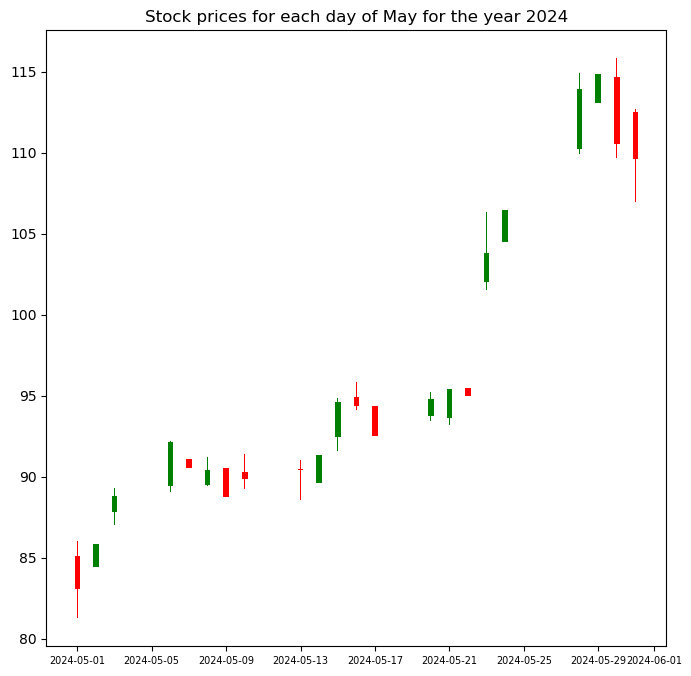

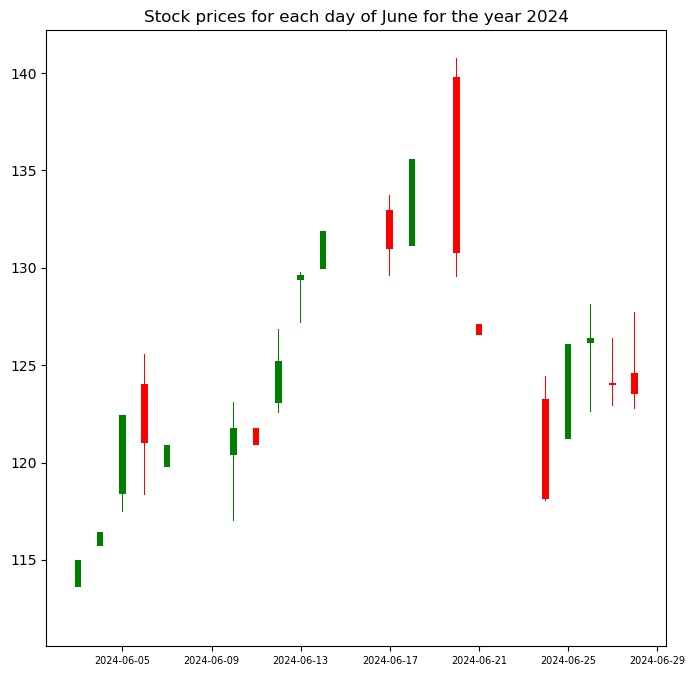

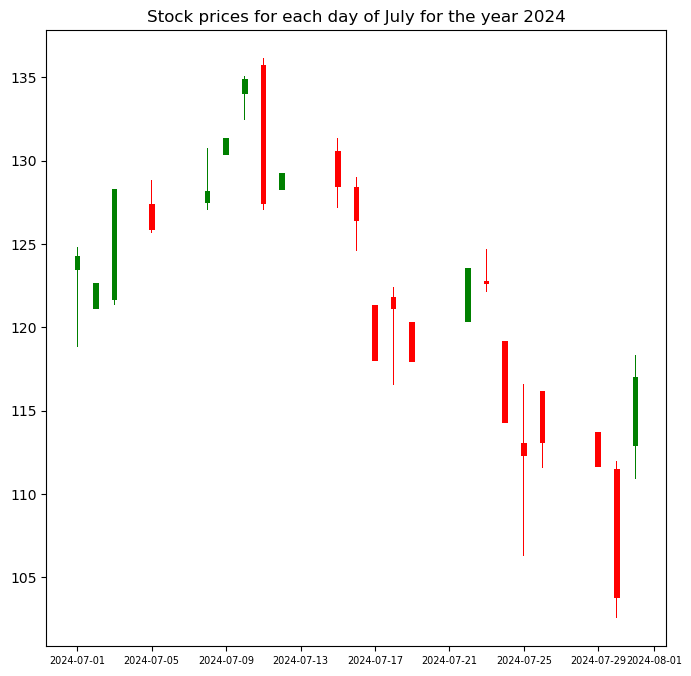

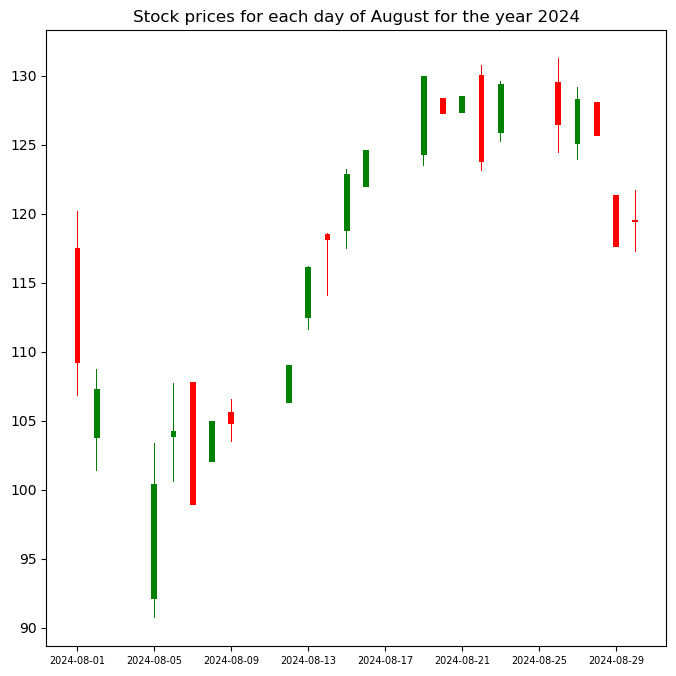

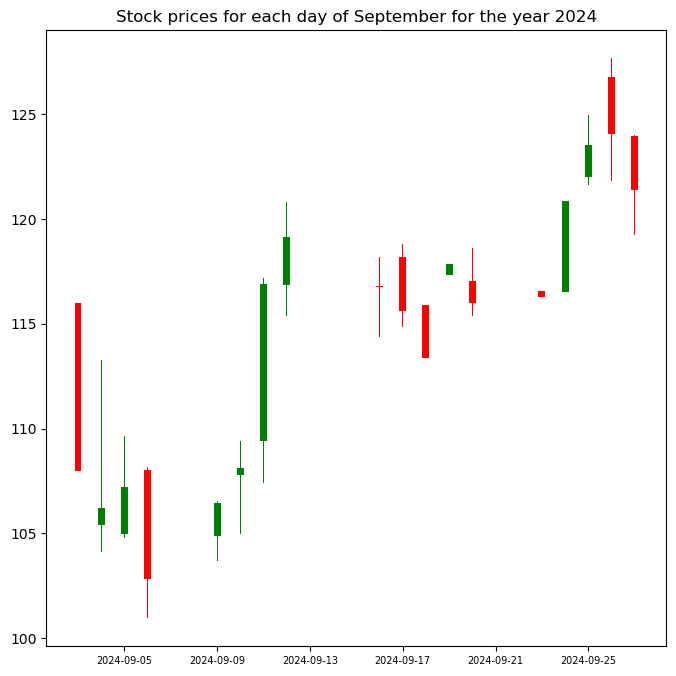

In [18]:
var_plot=1

var_mapNumberToMonth = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'}



for year in var_dfStocks['Year'].unique():
    for month in var_dfStocks['Month'].unique():
        
        var_dfPlotting = var_dfStocks[(var_dfStocks['Month'] == month) & (var_dfStocks['Year'] == year)]
        
        if(var_dfPlotting.empty):
            break
            
        plot_candlestick(var_dfPlotting,0.3,0.03)
        month = var_mapNumberToMonth[month]
        plt.title(f"Stock prices for each day of {month} for the year {year}")
        plt.xticks(size = 7)
        plt.show()
        var_plot+=1
        